
# Visualizing a Categorical and a Quantitative Variable
> Categorical variables are present in nearly every dataset, but they are especially prominent in survey data. In this chapter, you will learn how to create and customize categorical plots such as box plots, bar plots, count plots, and point plots. Along the way, you will explore survey data from young people about their interests, students about their study habits, and adult men about their feelings about masculinity. This is the Summary of lecture "Introduction to Data Visualization with Seaborn", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

# Count plots and bar plots


### Count plots
In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

In [27]:
survey_data = pd.read_csv('./dataset/young-people-survey-responses.csv', index_col=0)
survey_data.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Less than 21,False
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Less than 21,True
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Less than 21,True
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,21+,True
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Less than 21,False


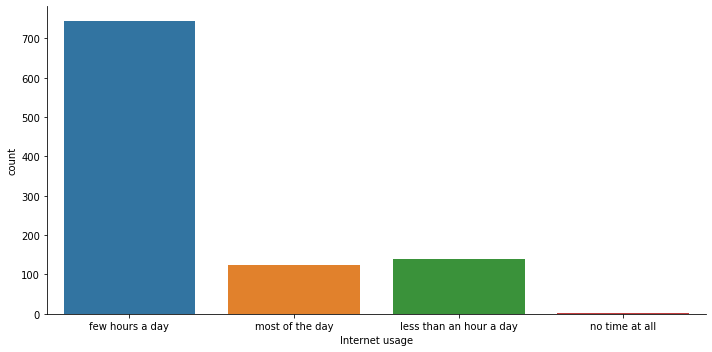

In [28]:
# Create count plot of internet usage
sns.catplot(x='Internet usage', data=survey_data, kind='count', aspect=2);
plt.tight_layout();

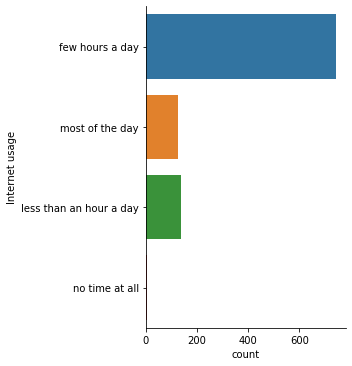

In [29]:
# Change the orientation of the plot
sns.catplot(y="Internet usage", data=survey_data, kind="count");

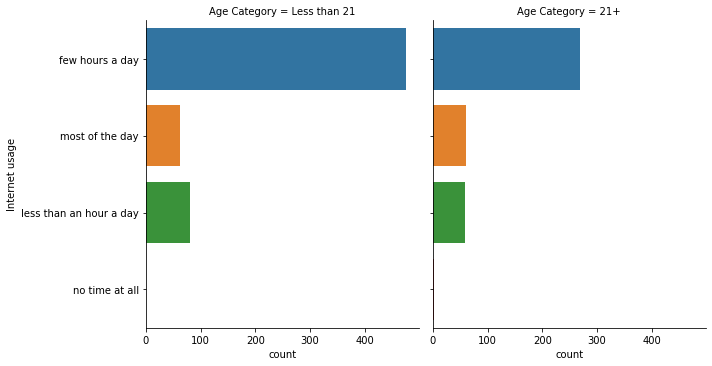

In [30]:
# Create column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data, kind="count", col='Age Category');

### Bar plots with percentages
Let's continue exploring the responses to a survey sent out to young people. The variable `"Interested in Math"` is True if the person reported being interested or very interested in mathematics, and False otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

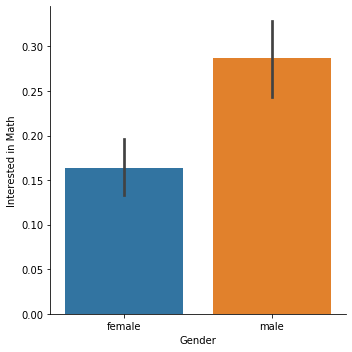

In [31]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x='Gender', y='Interested in Math', data=survey_data, kind='bar');

When the y-variable is True/False, bar plots will show the percentage of responses reporting True. This plot shows us that males report a much higher interest in math compared to females.

### Customizing bar plots
In this exercise, we'll explore data from students in secondary school. The "study_time" variable records each student's reported weekly study time as one of the following categories: `"<2 hours"`, `"2 to 5 hours"`, `"5 to 10 hours"`, or `">10 hours"`. Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

In [32]:
student_data = pd.read_csv('./dataset/student-alcohol-consumption.csv', index_col=0)
student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


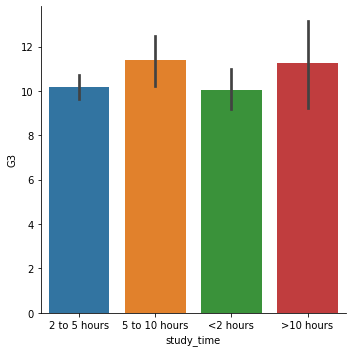

In [33]:
# Create bar plot of average final grade in each study category
sns.catplot(x='study_time', y='G3', data=student_data, kind='bar');

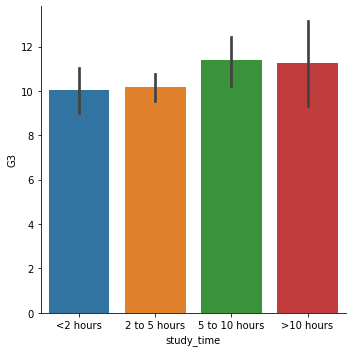

In [34]:
# Rearrange the categories
sns.catplot(x="study_time", y="G3", data=student_data, kind="bar",
            order = [
                '<2 hours',
                '2 to 5 hours',
                '5 to 10 hours',
                '>10 hours'
                ]);

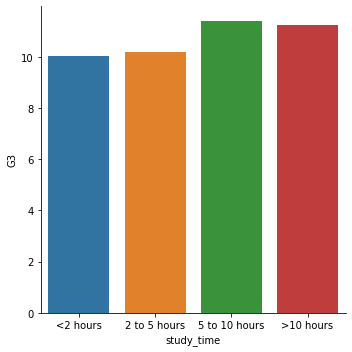

In [35]:
# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=["<2 hours", 
                   "2 to 5 hours", 
                   "5 to 10 hours", 
                   ">10 hours"],
            ci=None);

Students in our sample who studied more have a slightly higher average grade, but it's not a strong relationship.

## Box plots
- What is a box plot?
    - Shows the distribution of quantitative data
    - See median, spread, skewness, and outliers
    - Facilitates comparisons between groups

### Create and interpret a box plot
Let's continue using the student_data dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade ("G3") among students in different categories of "study_time".

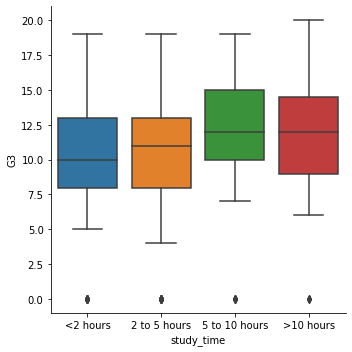

In [36]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x='study_time', y='G3',
            data=student_data,
            kind='box',
            order=study_time_order);

### Omitting outliers
Now let's use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who have internet access at home and those who don't. To do this, we'll use the "internet" variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the "location" variable, which is an indicator of whether a student lives in an urban (`"Urban"`) or rural (`"Rural"`) location.

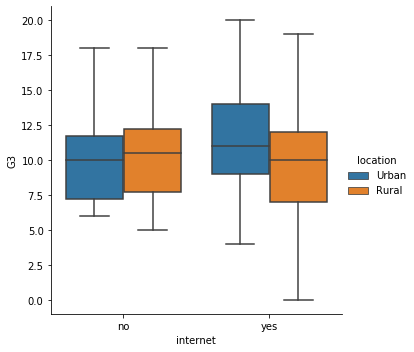

In [37]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x='internet', y='G3',
            data=student_data,
            kind='box',
            hue='location',
            sym='');

The median grades are quite similar between each group, but the spread of the distribution looks larger among students who have internet access.

### Adjusting the whiskers
In the lesson we saw that there are multiple ways to define the whiskers in a box plot. In this set of exercises, we'll continue to use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who are in a romantic relationship and those that are not. We'll use the "romantic" variable, which is a yes/no indicator of whether the student is in a romantic relationship.

Let's create a box plot to look at this relationship and try different ways to define the whiskers.

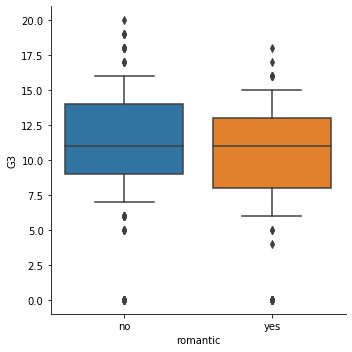

In [38]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=0.5);

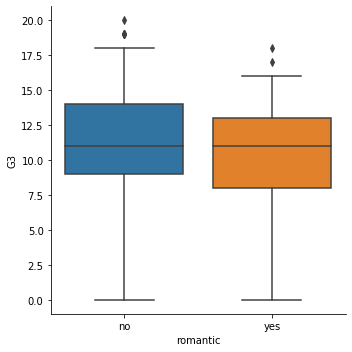

In [39]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[5, 95]);

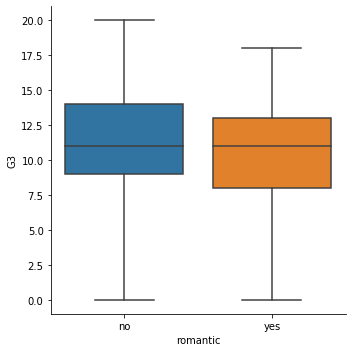

In [40]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100]);

The median grade is the same between these two groups, but the max grade is higher among students who are not in a romantic relationship.

## Point plots
- What are point plots?
    - Points show mean of quantitative variable
    - Vertical lines show 95% condence intervals
- Point plots vs. line plots
    - Both show:
        - Mean of quantitative variable
        - 95% condence intervals for the mean
    - Differences:
        - Line plot has quantitative variable (usually time) on x-axis
        - Point plot has categorical variable on x-axis
- Point plots vs. bar plots
    - Both show:
        - Mean of quantitative variable
        - 95% condence intervals for the mean

### Customizing point plots
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the "famrel" variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

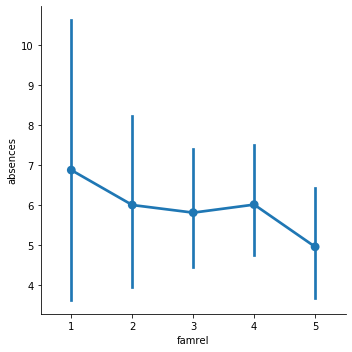

In [41]:
# Create a point plot of family relationship vs. absences
sns.catplot(x='famrel', y='absences', 
            data=student_data,
            kind='point');

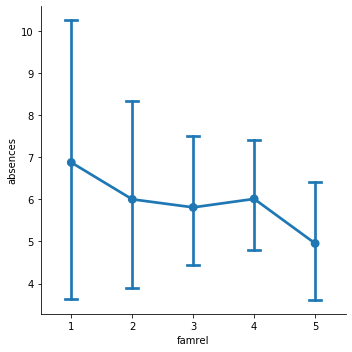

In [42]:
# Add caps to the confidence interval
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2);

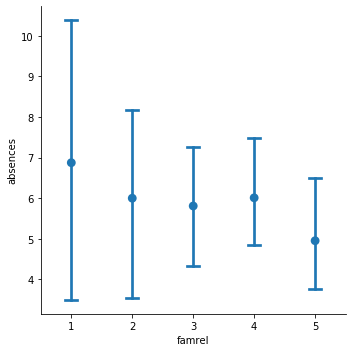

In [43]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
            data=student_data,
            kind="point",
            capsize=0.2,
            join=False);

While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here.

### Point plots with subgroups
Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

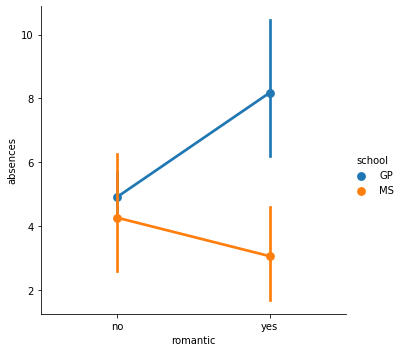

In [44]:
# Create a point plot with subgroups
sns.catplot(x='romantic', y='absences',
            data=student_data,
            kind='point',
            hue='school');

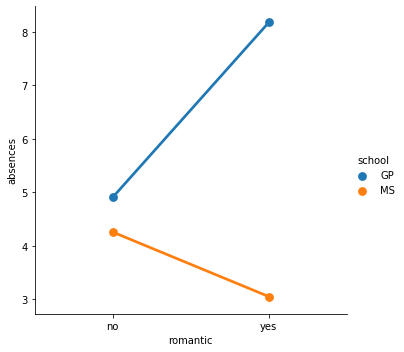

In [45]:
# Turn off the confidence intervals for this plot
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None);

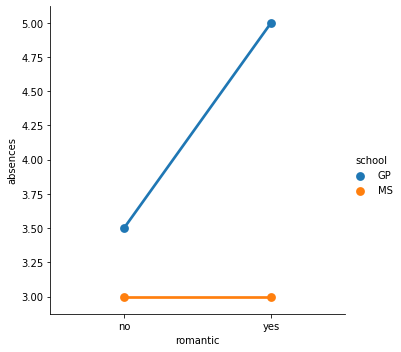

In [47]:
import numpy as np
# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None,
            estimator=np.median);

It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.